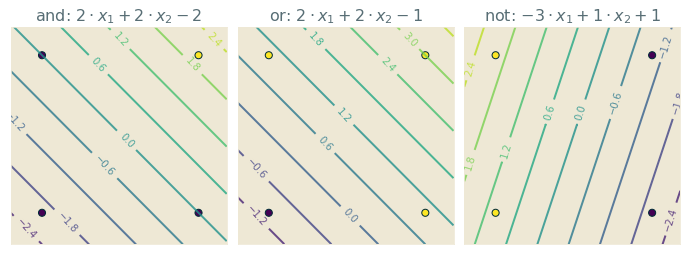

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Perceptron

X = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y_and = np.array([1, -1, -1, -1])
y_or = np.array([1, 1, 1, 0])
y_not = np.array([0, 0, 1, 1])

i = 1
h = .02

tasks = [
    (X, y_and, 'and'),
    (X, y_or, 'or'),
    (X, y_not, 'not'),
]

figure = plt.figure(figsize=(12, 4))

with plt.style.context('Solarize_Light2'):
    for index, ds in enumerate(tasks):

        X, y, name = ds

        x_min, x_max = -0.2, 1.2
        y_min, y_max = -0.2, 1.2
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        ax = plt.subplot(1, len(tasks), i)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1

        clf = Perceptron(tol=1e-3, random_state=0)
        clf.fit(X, y)  # 训练模型
        score = clf.score(X, y)  # 训练精度

        if clf.intercept_[0] < 0:
            ax.set_title(r"%s: $%d \cdot x_1 + %d \cdot x_2 %d$" % (name, clf.coef_[0, 0], clf.coef_[0, 1], clf.intercept_[0]), color="#586e75")
        else:
            ax.set_title(r"%s: $%d \cdot x_1 + %d \cdot x_2 + %d$" % (name, clf.coef_[0, 0], clf.coef_[0, 1], clf.intercept_[0]), color="#586e75")

        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # ax.contourf(xx, yy, Z, alpha=.8)
        contours = ax.contour(xx, yy, Z, 10, alpha=.8)
        ax.clabel(contours)
        ax.scatter(X[:, 0], X[:, 1], s=50, c=y, edgecolors='#002b36')
        # ax.text((xx.min()+xx.max())/2, yy.min()+0.05, ('acc = %.2f' % score).lstrip('0'), size=14, horizontalalignment='center')

plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()